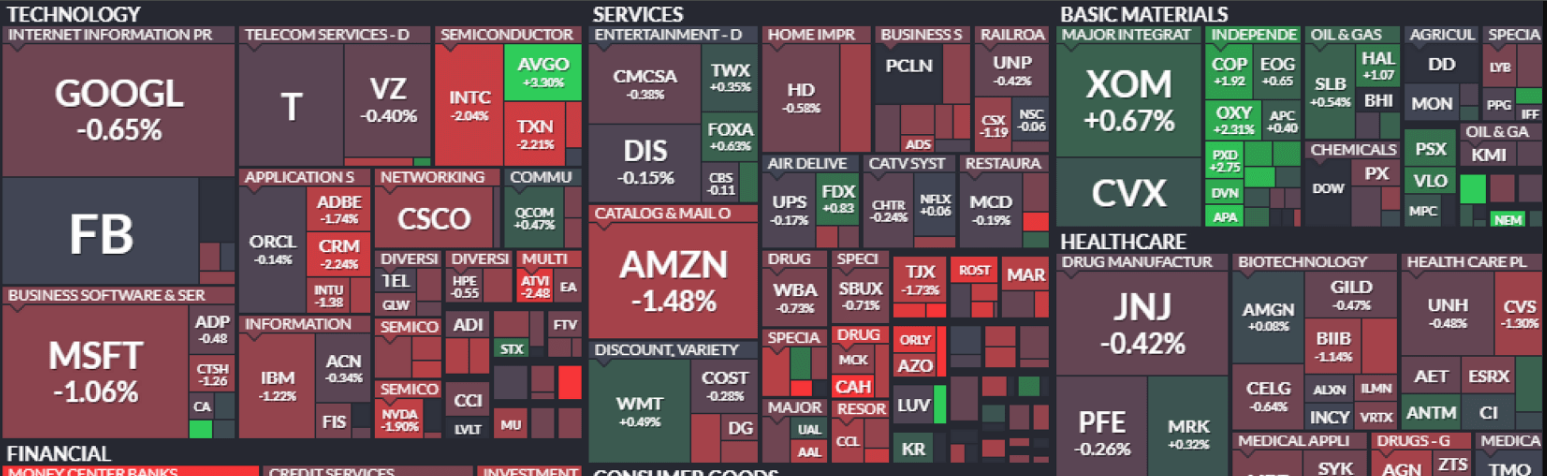

# Optimización de Portafolio


La estadística es un campo vasto, pero las herramientas y resultados que proporciona se han vuelto indispensables para las finanzas. Esto explica la popularidad de lenguajes específicos del dominio, como **R**, en la industria financiera. Cuanto más elaborados y complejos se vuelven los modelos estadísticos, más importante es contar con soluciones computacionales de alto rendimiento y fáciles de usar.

---

### Pruebas de Normalidad

La distribución normal puede considerarse la **distribución más importante en finanzas** y uno de los pilares estadísticos fundamentales de la teoría financiera. Entre otros, los siguientes conceptos clave de la teoría financiera descansan en gran medida sobre el supuesto de que los **rendimientos de un instrumento financiero están normalmente distribuidos**:

- **Teoría de portafolio**  
  Cuando los rendimientos de las acciones están normalmente distribuidos, la elección óptima del portafolio puede plantearse en un contexto donde solo son relevantes el **rendimiento esperado (media)**, la **varianza (volatilidad)** y las **covarianzas entre distintas acciones** para tomar decisiones de inversión (es decir, una composición óptima del portafolio).

- **Modelo de valoración de activos financieros (CAPM)**  
  De nuevo, si los rendimientos de las acciones están normalmente distribuidos, los precios de acciones individuales pueden expresarse elegantemente en relación lineal con un índice amplio del mercado; esta relación se expresa mediante una medida del **co-movimiento** de una acción con el índice del mercado llamada **beta (β)**.

> Otro supuesto central es el de **linealidad**. Por ejemplo, se asume que los mercados financieros muestran, en general, una relación lineal entre la **demanda** (por ejemplo, de acciones) y el **precio** a pagar por ellas. En otras palabras, se supone que los mercados son perfectamente líquidos en el sentido de que la variación en la demanda **no influye** en el precio unitario de un instrumento financiero.

---

### Hipótesis de Mercados Eficientes (EMH)

Un mercado eficiente es aquel en el que los precios reflejan toda la información disponible. El concepto de "toda" puede definirse de manera más restringida (por ejemplo, solo información públicamente disponible) o más amplia (incluyendo también información privada).  
Si esta hipótesis es válida, entonces los precios de las acciones fluctúan aleatoriamente y los **rendimientos están normalmente distribuidos**.

---

### Teoría de Valoración de Opciones

El movimiento Browniano se considera el **modelo de referencia** para la modelación de los movimientos aleatorios de precios de instrumentos financieros. La famosa fórmula de valoración de opciones de **Black-Scholes-Merton** utiliza un **movimiento Browniano geométrico** como modelo para las fluctuaciones aleatorias del precio de una acción en el tiempo. Esto conduce a **precios log-normales** y **rendimientos normales**.



---

### Caso de Referencia (Benchmark)

Para establecer el escenario de análisis, se parte del **movimiento Browniano geométrico**, uno de los procesos estocásticos canónicos usados en la modelación financiera. Las siguientes características aplican a sus trayectorias:

- **Rendimientos logarítmicos normales**  
  Los rendimientos logarítmicos entre dos tiempos cualesquiera $ 0 < s < t $, definidos como:  
  $$
  \
  \log\left(\frac{S_t}{S_s}\right) = \log(S_t) - \log(S_s)
  \
  $$  
  están **normalmente distribuidos**.

- **Valores log-normales**  
  En cualquier tiempo $ t > 0 $, los valores $ S_t $ están **log-normalmente distribuidos**.

---

### Preparación para Visualización y Librerías

Antes de continuar con el análisis, se prepara la configuración para gráficos. Luego, se importan varios paquetes de Python, incluyendo `scipy.stats` y `statsmodels.api`.


In [2]:
#!pip install yfinance --upgrade --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.59
    Uninstalling yfinance-0.2.59:
      Successfully uninstalled yfinance-0.2.59


In [3]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt
import scipy.optimize as sco
import yfinance as yf
import pandas as pd


In [4]:
#!pip install seaborn
import seaborn as sns

In [5]:
#plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

Generamos trayectorias Monte Carlo de un Movimiento Borwnianiano Geométrico

In [6]:
def gen_paths(S0, r, sigma, T, M, I):
    '''
    Genera trayectorias de Monte Carlo para un movimiento Browniano geométrico.

    Parámetros
    ==========
    S0: float
        Valor inicial del activo o índice
    r: float
        Tasa de interés libre de riesgo (constante)
    sigma: float
        Volatilidad (constante)
    T: float
        Horizonte de tiempo
    M: int
        Número de pasos temporales
    I: int
        Número de trayectorias a simular

    Retorna
    =======
    paths: ndarray, shape (M + 1, I)
        Trayectorias simuladas dadas las condiciones iniciales y parámetros
    '''
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0

    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()  # Normalización
        paths[t] = paths[t - 1] * np.exp(
            (r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rand
        )

    return paths


Mostramos ahora las 10 primeras trayectorias de la simulación.

In [7]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
np.random.seed(1000)

In [8]:
paths=gen_paths(S0, r, sigma, T, M, I)


In [9]:
S0*math.exp(r*T)

105.12710963760242

In [10]:
paths[-1].mean()

np.float64(105.12645392478755)

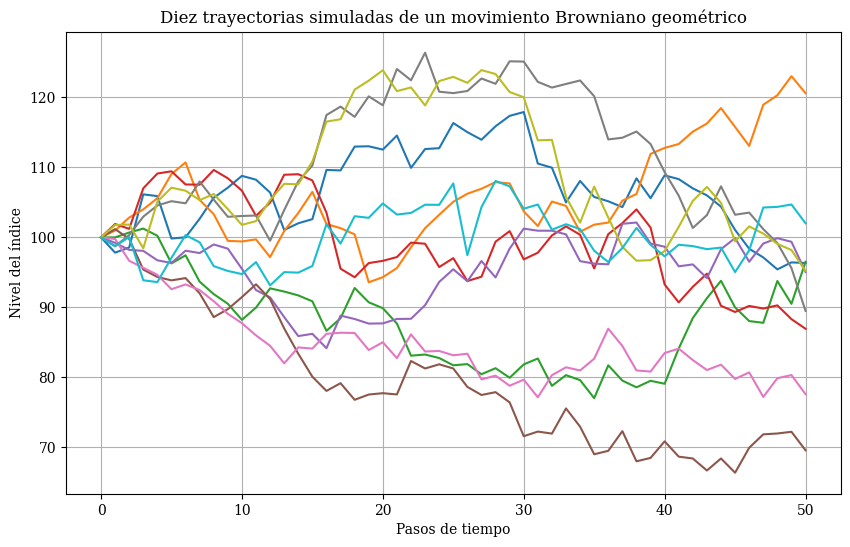

In [11]:
# Diez trayectorias simuladas de un movimiento Browniano geométrico
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('Pasos de tiempo')
plt.ylabel('Nivel del índice')
plt.title('Diez trayectorias simuladas de un movimiento Browniano geométrico')
plt.grid(True)
plt.show()


El principal interés es en los "log retornos"

In [12]:
paths[:,0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [13]:
log_returns = np.log(paths[1:] / paths[:-1])

In [14]:
log_returns[:,0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

Esto es algo que también puede experimentarse en los mercados financieros:  
días en los que se obtiene un **rendimiento positivo** sobre una inversión  
y otros días en los que se pierde dinero con respecto a la posición de riqueza más reciente.




Veamos las estadísticas:

In [15]:
def print_statistics(array):
    '''
    Imprime estadísticas seleccionadas.

    Parámetros
    ==========
    array: ndarray
        Objeto (array) sobre el que se calcularán las estadísticas
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('Estadística', 'Valor'))
    print(30 * '-')
    print('%14s %15.5f' % ('Tamaño', sta[0]))
    print('%14s %15.5f' % ('Mínimo', sta[1][0]))
    print('%14s %15.5f' % ('Máximo', sta[1][1]))
    print('%14s %15.5f' % ('Media', sta[2]))
    print('%14s %15.5f' % ('Desv. Est.', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('Asimetría', sta[4]))
    print('%14s %15.5f' % ('Curtosis', sta[5]))


In [16]:
print_statistics(log_returns.flatten())

   Estadística           Valor
------------------------------
        Tamaño  12500000.00000
        Mínimo        -0.15664
        Máximo         0.15371
         Media         0.00060
    Desv. Est.         0.02828
     Asimetría         0.00055
      Curtosis         0.00085


In [17]:
log_returns.mean()*M+0.5+sigma**2 #Media anualizada

np.float64(0.5700000000000001)

In [18]:
log_returns.std() * math.sqrt(M) #Volatilidad anualizada

np.float64(0.20000000000000015)

El conjunto de datos en este caso consiste en **12,500,000 puntos de datos**, cuyos valores se encuentran principalmente entre ±0.15.  

Se esperaría que los valores anualizados fueran aproximadamente de **0.05 para la media de los rendimientos** (tras corregir por el término de Itô) y de **0.2 para la desviación estándar (volatilidad)**.  
Los valores anualizados obtenidos coinciden casi perfectamente con estos valores esperados  


Una de las razones de esta buena coincidencia es el uso de la técnica de **emparejamiento de momentos (moment matching)** para la **reducción de varianza** al generar los números aleatorios  





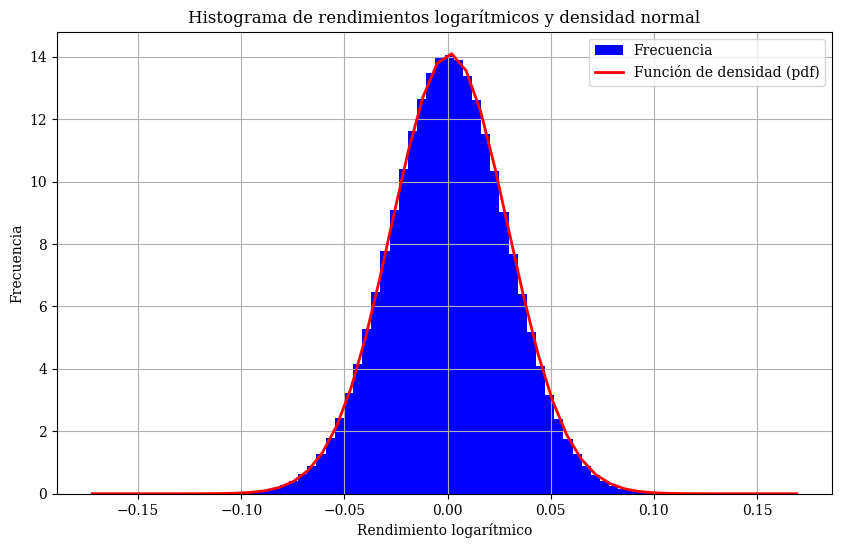

In [19]:
# Histograma de rendimientos logarítmicos del movimiento Browniano geométrico
# y función de densidad de probabilidad normal
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True,
         label='Frecuencia', color='b')
plt.xlabel('Rendimiento logarítmico')
plt.ylabel('Frecuencia')

x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
         'r', lw=2.0, label='Función de densidad (pdf)')

plt.title('Histograma de rendimientos logarítmicos y densidad normal')
plt.legend()
plt.grid(True)
plt.show()


Podemos ayudarnos a saber si nuestros retornos se distribuyen de manera normal creando alguna función, por ejemplo:

In [20]:
def normality_tests(arr):
    '''
    Pruebas de normalidad para un conjunto de datos dado.

    Parámetros
    ==========
    arr: ndarray
        Objeto sobre el que se generarán las estadísticas
    '''
    print('Asimetría del conjunto(Skewnes)     %14.3f' % scs.skew(arr))
    print('Valor p de la prueba de asimetría %10.3f' % scs.skewtest(arr)[1])
    print('Curtosis del conjunto      %14.3f' % scs.kurtosis(arr))
    print('Valor p de la prueba de curtosis  %10.3f' % scs.kurtosistest(arr)[1])
    print('Valor p de la prueba de normalidad %9.3f' % scs.normaltest(arr)[1])


In [21]:
normality_tests(log_returns.flatten())

Asimetría del conjunto(Skewnes)              0.001
Valor p de la prueba de asimetría      0.430
Curtosis del conjunto               0.001
Valor p de la prueba de curtosis       0.541
Valor p de la prueba de normalidad     0.607


Finalmente, se realiza una verificación para determinar si los **valores al final del período** están efectivamente **distribuidos log-normalmente**.  

Esto se reduce a realizar una **prueba de normalidad**, ya que basta con **transformar los datos aplicando la función logarítmica** para obtener valores que, en teoría, deberían estar distribuidos normalmente.




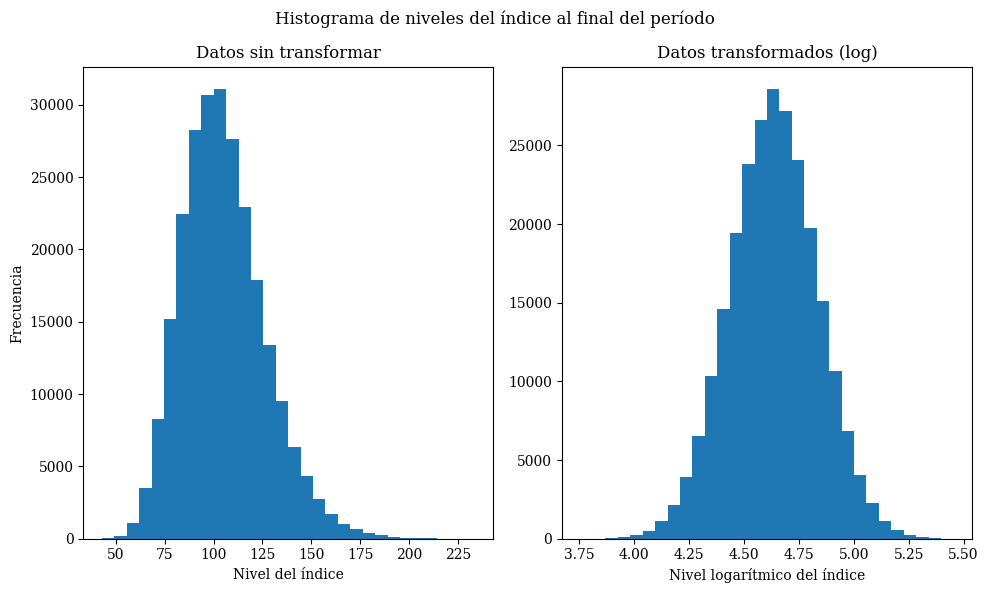

In [22]:
# Histograma de los niveles del índice al final del período simulados
# para un movimiento Browniano geométrico (datos normales y log-transformados)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.hist(paths[-1], bins=30)
ax1.set_xlabel('Nivel del índice')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Datos sin transformar')

ax2.hist(np.log(paths[-1]), bins=30)
ax2.set_xlabel('Nivel logarítmico del índice')
ax2.set_title('Datos transformados (log)')
plt.suptitle('Histograma de niveles del índice al final del período')
plt.tight_layout()
plt.show()


Las estadísticas del conjunto de datos muestran el comportamiento esperado—por ejemplo, un valor medio cercano a **105**.  

Los valores del **nivel logarítmico del índice** presentan **valores de asimetría y curtosis cercanos a cero**,  
y también muestran **valores p elevados**, lo que proporciona un fuerte respaldo a la **hipótesis de distribución normal**.


In [23]:
print_statistics(paths[-1])

   Estadística           Valor
------------------------------
        Tamaño    250000.00000
        Mínimo        42.74870
        Máximo       233.58435
         Media       105.12645
    Desv. Est.        21.23174
     Asimetría         0.61116
      Curtosis         0.65182


In [24]:
print_statistics(np.log(paths[-1]))

   Estadística           Valor
------------------------------
        Tamaño    250000.00000
        Mínimo         3.75534
        Máximo         5.45354
         Media         4.63517
    Desv. Est.         0.19998
     Asimetría        -0.00092
      Curtosis        -0.00327


In [25]:
normality_tests(np.log(paths[-1]))

Asimetría del conjunto(Skewnes)             -0.001
Valor p de la prueba de asimetría      0.851
Curtosis del conjunto              -0.003
Valor p de la prueba de curtosis       0.744
Valor p de la prueba de normalidad     0.931


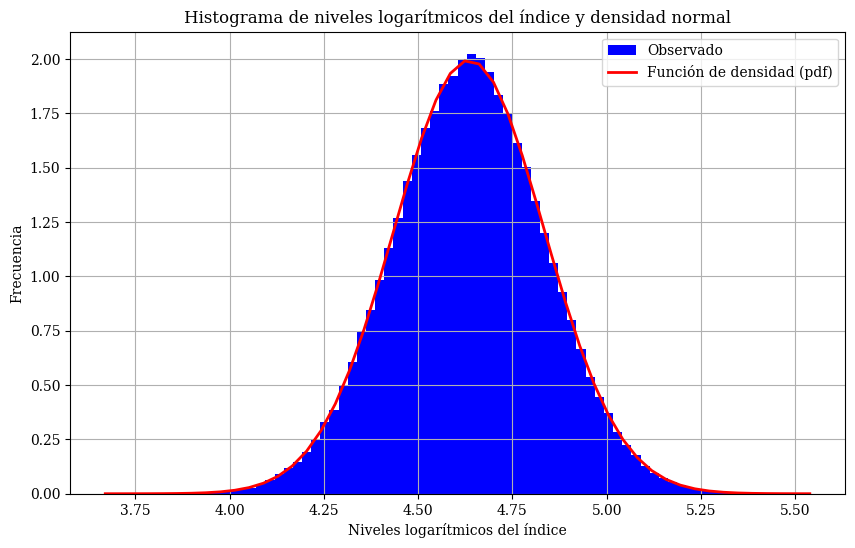

In [26]:
# Histograma de niveles logarítmicos del índice simulados por movimiento Browniano geométrico
# y función de densidad de probabilidad normal
plt.figure(figsize=(10, 6))

log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, density=True,
         label='Observado', color='b')

plt.xlabel('Niveles logarítmicos del índice')
plt.ylabel('Frecuencia')

x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
         'r', lw=2.0, label='Función de densidad (pdf)')

plt.title('Histograma de niveles logarítmicos del índice y densidad normal')
plt.legend()
plt.grid(True)
plt.show()


# DATOS DEL MUNDO REAL

Utilizaremos **cuatro series de tiempo financieras históricas**,  
dos correspondientes a acciones del sector tecnológico y dos a fondos cotizados en bolsa (ETFs):

- **AAPL.O**: Precio de la acción de Apple Inc.  
- **MSFT.O**: Precio de la acción de Microsoft Inc.  
- **SPY**: Fondo cotizado (ETF) SPDR S&P 500  
- **EEM**: Fondo cotizado (ETF) iShares MSCI Emerging Markets (mercados emergentes)


In [27]:
#import yfinance as yf
#import pandas as pd

#  símbolos
symbols = ['SPY', 'EEM', 'AAPL', 'MSFT']

# Descargar datos desde Yahoo Finance '01-enero-2021' a '30-abril-2025'
data = yf.download(symbols,
                   start='2021-01-01',
                   end='2025-04-30',
                   auto_adjust=False)['Adj Close']

# Eliminar filas con valores faltantes
data = data.dropna()

# Mostrar resumen de la estructura del DataFrame
data.info()


[*********************100%***********************]  4 of 4 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1085 entries, 2021-01-04 to 2025-04-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1085 non-null   float64
 1   EEM     1085 non-null   float64
 2   MSFT    1085 non-null   float64
 3   SPY     1085 non-null   float64
dtypes: float64(4)
memory usage: 42.4 KB


In [28]:
data.head()

Ticker,AAPL,EEM,MSFT,SPY
Date,,,,
2021-01-04,126.239677,47.388088,210.002014,347.254791
2021-01-05,127.800468,48.527229,210.204620,349.646454
2021-01-06,123.498550,48.117142,204.754135,351.736816
2021-01-07,127.712715,48.572792,210.580811,356.962769
2021-01-08,128.815002,49.857738,211.863861,358.996552


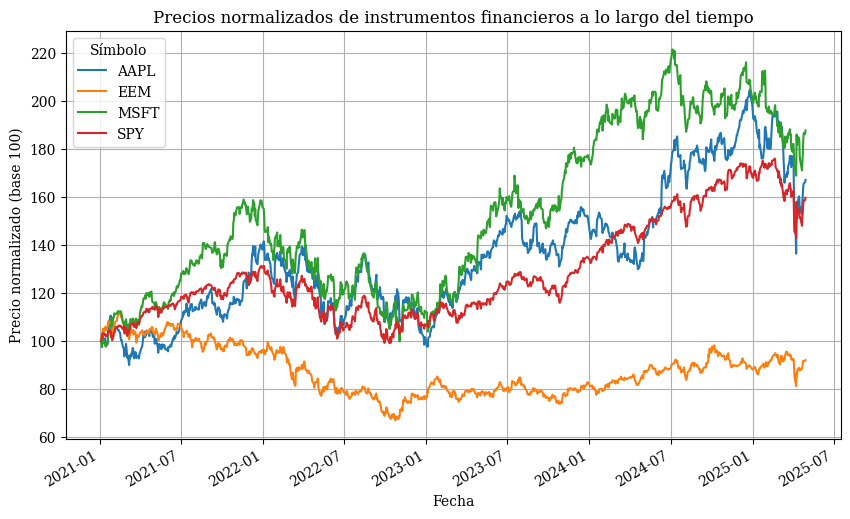

In [29]:
# Precios normalizados de los instrumentos financieros a lo largo del tiempo
(data / data.iloc[0] * 100).plot(figsize=(10, 6))

plt.title('Precios normalizados de instrumentos financieros a lo largo del tiempo')
plt.ylabel('Precio normalizado (base 100)')
plt.xlabel('Fecha')
plt.grid(True)
plt.legend(title='Símbolo')
plt.show()


In [30]:
log_returns = np.log(data / data.shift(1)) #Log retornos
log_returns.head()

Ticker,AAPL,EEM,MSFT,SPY
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.012288,0.023754,0.000964,0.006864
2021-01-06,-0.034241,-0.008487,-0.026272,0.005961
2021-01-07,0.033554,0.009425,0.028060,0.014748
2021-01-08,0.008594,0.026110,0.006074,0.005681


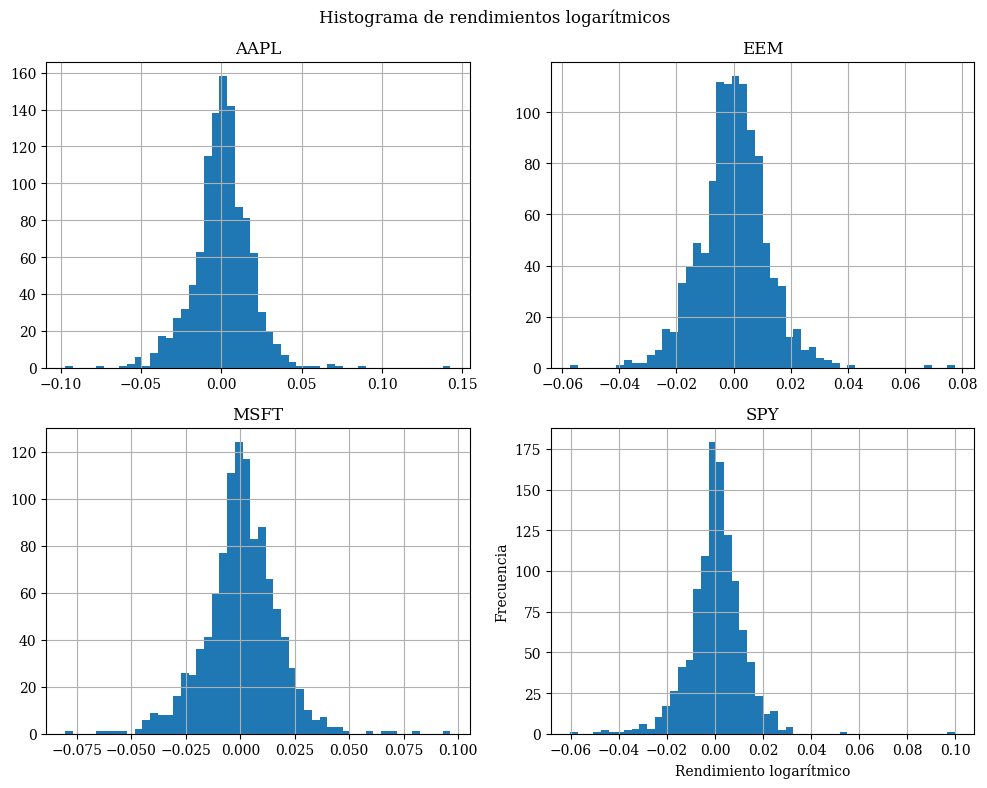

In [31]:
# Histograma de rendimientos logarítmicos
log_returns.hist(bins=50, figsize=(10, 8))

plt.suptitle('Histograma de rendimientos logarítmicos')
plt.xlabel('Rendimiento logarítmico')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [32]:
for sym in symbols:
    print('\nResultados para el símbolo {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)



Resultados para el símbolo SPY
------------------------------
   Estadística           Valor
------------------------------
        Tamaño      1084.00000
        Mínimo        -0.06033
        Máximo         0.09986
         Media         0.00043
    Desv. Est.         0.01121
     Asimetría         0.14841
      Curtosis         7.72828

Resultados para el símbolo EEM
------------------------------
   Estadística           Valor
------------------------------
        Tamaño      1084.00000
        Mínimo        -0.05723
        Máximo         0.07745
         Media        -0.00008
    Desv. Est.         0.01189
     Asimetría         0.25413
      Curtosis         3.14424

Resultados para el símbolo AAPL
------------------------------
   Estadística           Valor
------------------------------
        Tamaño      1084.00000
        Mínimo        -0.09701
        Máximo         0.14262
         Media         0.00047
    Desv. Est.         0.01794
     Asimetría         0.21943
    

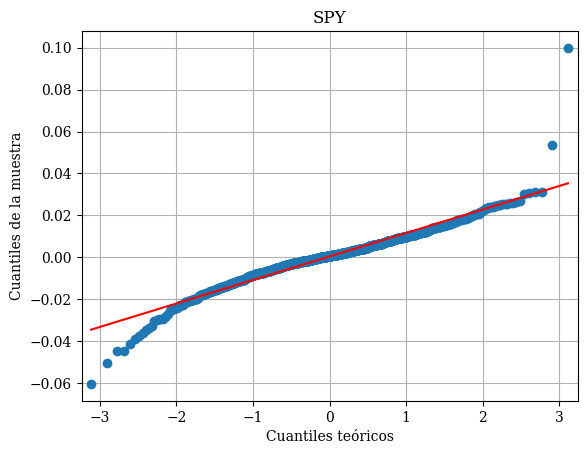

In [33]:
# Gráfico Q-Q para verificar la normalidad de los rendimientos logarítmicos de SPY
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de la muestra')
plt.grid(True)
plt.show()


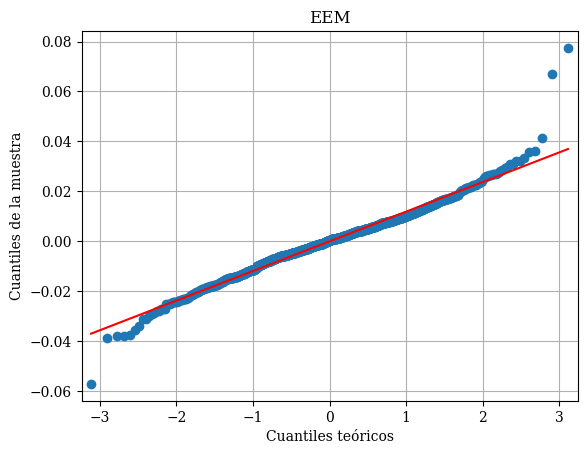

In [34]:
# Gráfico Q-Q para verificar la normalidad de los rendimientos logarítmicos de EEM
sm.qqplot(log_returns['EEM'].dropna(), line='s')
plt.title('EEM')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de la muestra')
plt.grid(True)
plt.show()

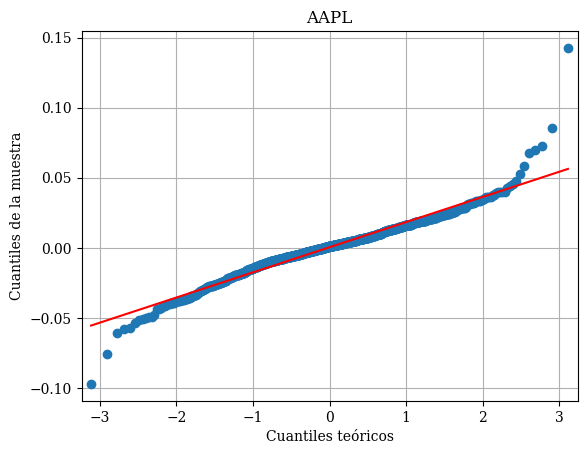

In [35]:
# Gráfico Q-Q para verificar la normalidad de los rendimientos logarítmicos de AAPL
sm.qqplot(log_returns['AAPL'].dropna(), line='s')
plt.title('AAPL')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de la muestra')
plt.grid(True)
plt.show()

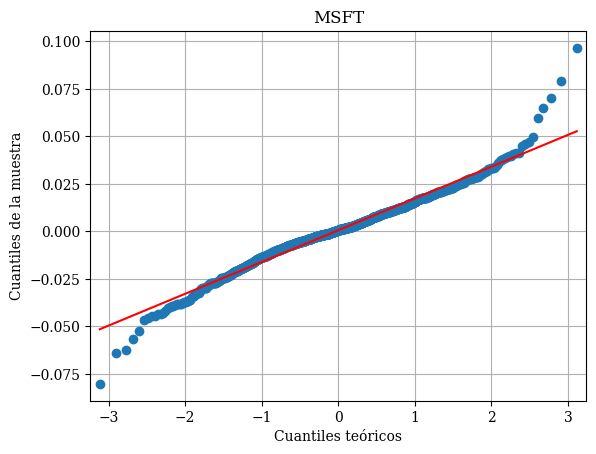

In [36]:
# Gráfico Q-Q para verificar la normalidad de los rendimientos logarítmicos de MSFT
sm.qqplot(log_returns['MSFT'].dropna(), line='s')
plt.title('MSFT')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de la muestra')
plt.grid(True)
plt.show()

In [37]:
for sym in symbols:
    print('\nResultados para el símbolo {}'.format(sym))
    print(32 * '-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)



Resultados para el símbolo SPY
--------------------------------
Asimetría del conjunto(Skewnes)              0.148
Valor p de la prueba de asimetría      0.046
Curtosis del conjunto               7.728
Valor p de la prueba de curtosis       0.000
Valor p de la prueba de normalidad     0.000

Resultados para el símbolo EEM
--------------------------------
Asimetría del conjunto(Skewnes)              0.254
Valor p de la prueba de asimetría      0.001
Curtosis del conjunto               3.144
Valor p de la prueba de curtosis       0.000
Valor p de la prueba de normalidad     0.000

Resultados para el símbolo AAPL
--------------------------------
Asimetría del conjunto(Skewnes)              0.219
Valor p de la prueba de asimetría      0.003
Curtosis del conjunto               5.551
Valor p de la prueba de curtosis       0.000
Valor p de la prueba de normalidad     0.000

Resultados para el símbolo MSFT
--------------------------------
Asimetría del conjunto(Skewnes)              0.028
Val

### Análisis de Normalidad de los Rendimientos Logarítmicos

Se aplicaron pruebas estadísticas de normalidad a los rendimientos logarítmicos de cuatro instrumentos financieros: **SPY**, **EEM**, **AAPL** y **MSFT**.  
Estas pruebas incluyeron:

- **Asimetría (Skewness)**  
- **Curtosis (Kurtosis)**  
- **Prueba de normalidad combinada** (D’Agostino y Pearson)

---

####  Resultados principales

| Símbolo | Asimetría | Curtosis | Valor-p Normalidad | ¿Distribución normal? |
|---------|-----------|----------|--------------------|------------------------|
| SPY     | 0.148     | 7.728    | 0.000              | ❌ No (colas gruesas)  |
| EEM     | 0.254     | 3.144    | 0.000              | ❌ No (ligera asimetría) |
| AAPL    | 0.219     | 5.551    | 0.000              | ❌ No (colas pesadas)  |
| MSFT    | 0.028     | 2.621    | 0.000              | ❌ No (casi simétrica, pero curtosis elevada) |

---

####  Interpretación

- En todos los casos, el **valor-p fue cercano a cero**, lo que implica **rechazo de la hipótesis nula de normalidad**.
- Aunque las asimetrías son relativamente bajas, la **curtosis es consistentemente superior a 3**, lo que sugiere la presencia de **colas pesadas** (distribuciones leptocúrticas).
- Esto implica que los rendimientos tienen mayor probabilidad de eventos extremos (tanto positivos como negativos) comparado con una distribución normal.

---

####  Conclusión

Los datos **no siguen una distribución normal**.  
Esto es importante para el modelado financiero, ya que:

- Técnicas que **asumen normalidad** (como Black-Scholes o VaR paramétrico) pueden **subestimar el riesgo**.
- Es recomendable explorar modelos con **colas pesadas**, como la **distribución t-student**, métodos no paramétricos o simulación Monte Carlo.

---



# Optimización de Portafolios

La **teoría moderna de portafolios**, también conocida como **teoría media-varianza**, es uno de los pilares fundamentales de la teoría financiera.  




###Los Datos

El análisis y los ejemplos que siguen utilizan los **mismos instrumentos financieros** que se usaron anteriormente.

La idea básica de la **Teoría Moderna de Portafolios (MPT)** es aprovechar la **diversificación** para lograr uno de los siguientes objetivos:

- **Minimizar el riesgo** del portafolio dado un nivel objetivo de retorno, o  
- **Maximizar el retorno** del portafolio dado un cierto nivel de riesgo.

Se esperaría observar **efectos de diversificación** al combinar correctamente una mayor cantidad de activos y con cierta **diversidad entre ellos**.  

Sin embargo, para ilustrar los conceptos básicos y mostrar efectos típicos, **cuatro instrumentos financieros** son suficientes.




In [38]:

symbols = ['SPY', 'EEM', 'AAPL', 'MSFT']

In [39]:
noa=len(symbols)


In [40]:
data=data[symbols]

In [41]:
rets=np.log(data/data.shift(1))

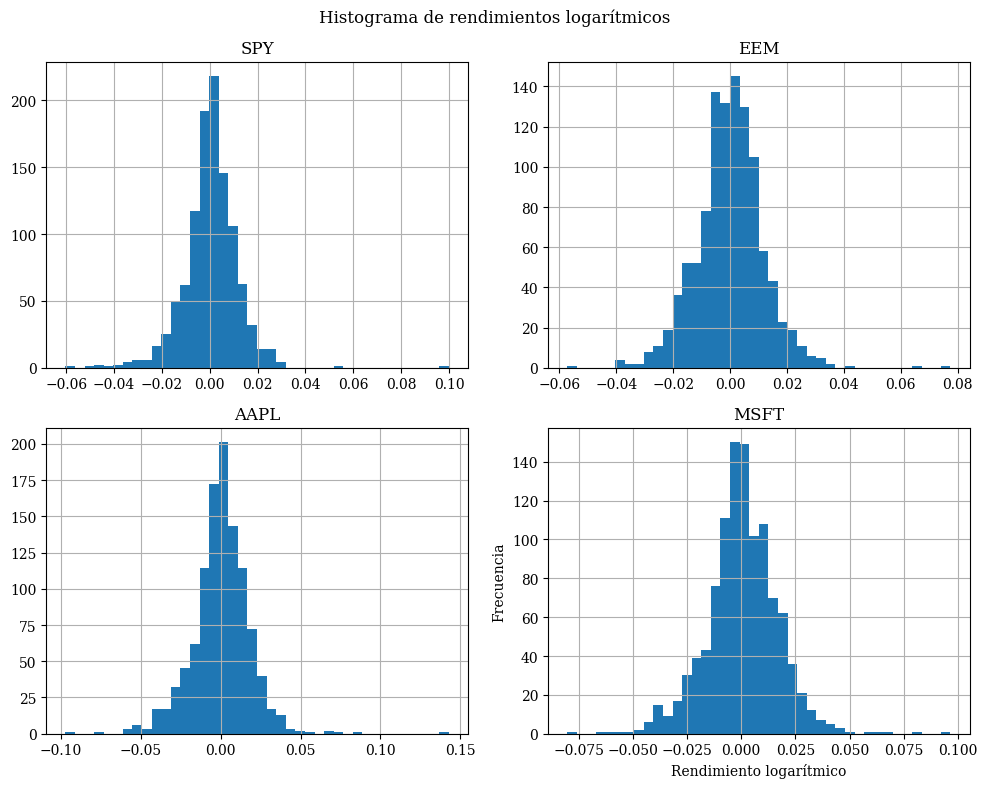

In [42]:
rets.hist(bins=40, figsize=(10, 8))
plt.suptitle('Histograma de rendimientos logarítmicos')
plt.xlabel('Rendimiento logarítmico')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## La matriz de covarianzas será la pieza central del análisis

In [43]:
rets.mean() * 252 #Media de retornos anualizados

,0
Ticker,
SPY,0.108723
EEM,-0.019102
AAPL,0.119342
MSFT,0.146303


In [44]:
rets.cov() * 252 #Matriz de covarianza anualizada

Ticker,SPY,EEM,AAPL,MSFT
Ticker,,,,
SPY,0.031645,0.022728,0.039389,0.036653
EEM,0.022728,0.035609,0.028255,0.024099
AAPL,0.039389,0.028255,0.081145,0.051316
MSFT,0.036653,0.024099,0.051316,0.070577


###Restricciones de Inversión: Solo Posiciones Largas

En lo que sigue, se asume que el inversionista **no tiene permitido abrir posiciones cortas**  
en ninguno de los instrumentos financieros.  

Esto significa que **solo se permiten posiciones largas**, lo que implica que **el 100% de la riqueza del inversionista** debe distribuirse entre los instrumentos disponibles de tal manera que:

- Todas las posiciones sean **positivas (largas)**, y  
- La **suma total** de las proporciones invertidas sea igual a **100%**.

Dado que se están considerando **cuatro instrumentos financieros**, se podría, por ejemplo, **invertir cantidades iguales en cada uno**, es decir, **25% del capital disponible en cada instrumento**.

---

El siguiente código genera **cuatro números aleatorios distribuidos uniformemente entre 0 y 1**  
y luego los **normaliza** para que **la suma total sea igual a 1**:

In [45]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [46]:

weights

array([0.07650728, 0.06021919, 0.63364218, 0.22963135])

In [47]:
weights.sum()

np.float64(1.0)

## Rendimiento Esperado de un Portafolio

El **rendimiento esperado del portafolio** se define como la **media ponderada de los rendimientos esperados de los activos individuales**, donde los pesos corresponden a la proporción del capital invertido en cada instrumento.

La fórmula es la siguiente:
$$
\
\mu_p = \mathbb{E}[r_p] = \sum_{i=1}^{I} w_i \, \mu_i
\
$$
Donde:
- $ \mu_p $: rendimiento esperado del portafolio  
- $ w_i $: peso del activo $ i $ en el portafolio (proporción del capital invertido)  
- $ \mu_i $: rendimiento esperado del activo $ i $
- $ I $: número total de activos

También puede expresarse en forma matricial como:
$$
\
\mu_p = \mathbf{w}^\top \boldsymbol{\mu}
\
$$
Donde:
- $ \mathbf{w} $: vector columna de pesos  
- $ \boldsymbol{\mu} $: vector columna de rendimientos esperados


In [67]:
np.sum(rets.mean() * weights) * 252   #Retorno anualizado, dados los pesos del portafolio

np.float64(0.10485532491834591)

## Varianza Esperada del Portafolio

El **segundo elemento importante** en la Teoría Moderna de Portafolios (MPT) es la **varianza esperada del portafolio**, la cual mide su riesgo total.

La **covarianza entre dos activos financieros** se define como:
$$
\
\sigma_{ij} = \sigma_{ji} = \mathbb{E} \left[(r_i - \mu_i)(r_j - \mu_j)\right]
\
$$
La **varianza de un activo individual** es un caso particular de la covarianza consigo mismo:
$$
\
\sigma_i^2 = \mathbb{E} \left[(r_i - \mu_i)^2\right]
\
$$
---


# Fórmula General de la Varianza Esperada del Portafolio

La **varianza del portafolio** mide el **riesgo total** del mismo, considerando no solo las varianzas individuales de los activos, sino también sus **covarianzas**.

La fórmula general es:
$$
\sigma_p^2 = \sum_{i \in I} \sum_{j \in I} w_i w_j \, \sigma_{ij}
\
$$
Donde:
- $ \sigma_p^2 $: varianza del rendimiento del portafolio  
- $ w_i, w_j $: pesos de los activos $ i $ y $ j $ en el portafolio  
- $ \sigma_{ij} $: covarianza entre los activos $ i $ y $ j $
- $ I $: conjunto de todos los activos del portafolio

---
También puede expresarse en **forma matricial compacta** como:
$$
\
\sigma_p^2 = \mathbf{w}^\top \, \boldsymbol{\Sigma} \, \mathbf{w}
\
$$
Donde:
- $ \mathbf{w} $: vector de pesos  
- $ \boldsymbol{\Sigma} $: matriz de covarianza de los rendimientos

#En Python lo anterior se reduce a una línea de código


In [68]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

np.float64(0.04117236365356953)

In [69]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

0.20290974262851336

# Selección de Portafolios Media-Varianza

Con esto, se completa en gran medida el conjunto de herramientas necesarias para la **selección de portafolios bajo el enfoque media-varianza**.

Lo que más interesa a los inversionistas es conocer **qué combinaciones de riesgo y retorno son posibles** dados un conjunto específico de instrumentos financieros y sus características estadísticas.

---

Para este propósito, se implementa una **simulación Monte Carlo**, con el fin de **generar aleatoriamente vectores de pesos del portafolio a gran escala**.

Para cada asignación simulada, el código registra el correspondiente:
- **Rendimiento esperado del portafolio**, y  
- **Varianza del portafolio**.

---

Para simplificar el código, se definen dos funciones:
- `port_ret()`: calcula el rendimiento esperado del portafolio  
- `port_vol()`: calcula la volatilidad (desviación estándar) del portafolio


In [70]:
def port_ret(weights):
 return np.sum(rets.mean() * weights) * 252

In [71]:
def port_vol(weights):
 return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

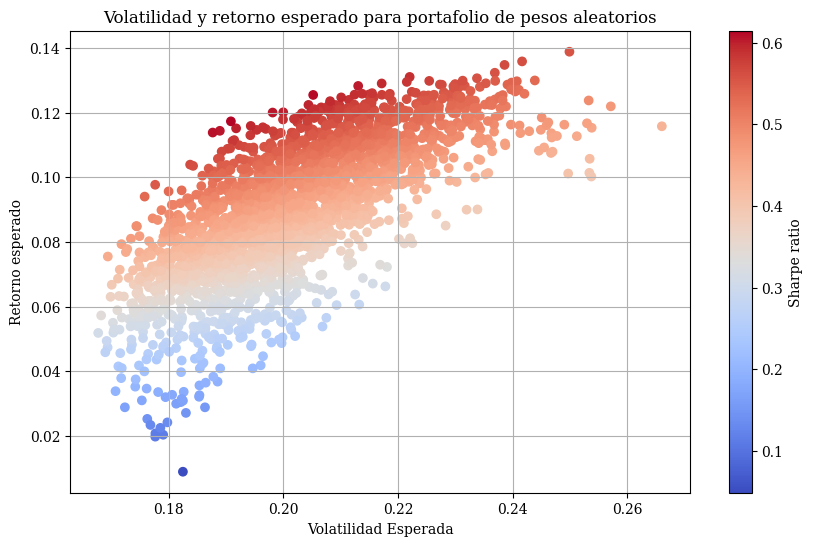

In [93]:
n_portafolios = 2500
noa = len(data.columns)  # número de activos

prets = []
pvols = []

for p in range(n_portafolios):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))

# Convertir a arrays para graficar
prets = np.array(prets)
pvols = np.array(pvols)

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap='coolwarm')
plt.xlabel('Volatilidad Esperada')
plt.ylabel('Retorno esperado')
plt.colorbar(label='Sharpe ratio')
plt.grid(True)
plt.title('Volatilidad y retorno esperado para portafolio de pesos aleatorios')
plt.show()


## Análisis del Comportamiento del Portafolio Simulado

El gráfico generado representa el espacio de combinaciones **riesgo-retorno** para miles de portafolios aleatorios construidos a partir de 4 activos financieros, utilizando simulación Monte Carlo.

---

## Forma de la nube de puntos

- La nube tiene una forma **convexa ascendente**, típica del **frente eficiente** (efficient frontier).
- Los portafolios ubicados **sobre la curva superior** son los más eficientes:  
  ofrecen **mayor rendimiento esperado para un nivel dado de riesgo**.
- Los portafolios **por debajo de esa curva** son ineficientes, ya que existen mejores alternativas.

---

##Coloración: Ratio de Sharpe

- El color de cada punto representa su **Ratio de Sharpe** (rendimiento esperado dividido entre la volatilidad esperada).
- Los **colores más intensos (rojos)** indican **portafolios con mayor Sharpe**, es decir, mejor relación riesgo/retorno.
- Estos se concentran aproximadamente en la zona de:
  - **Volatilidad entre 0.19 y 0.22**
  - **Rendimientos esperados entre 0.10 y 0.13**

---

## Zonas subóptimas

- En la parte inferior izquierda hay portafolios con **rendimientos muy bajos o negativos**, aunque tengan baja volatilidad.
- Los puntos con **colores azulados** representan **combinaciones subóptimas** con bajo ratio de Sharpe.

---

## Conclusión

Esta simulación ilustra cómo la **diversificación permite construir portafolios más eficientes**.  
La teoría media-varianza se refleja claramente en la forma y distribución de los puntos.

---

## Próximo paso recomendado

> **Identificar el portafolio con el mayor Ratio de Sharpe**  
> (también conocido como el **portafolio tangente**, en presencia de un activo libre de riesgo).



#Portafolios Óptimos

Esta función de **minimización** es bastante general y permite:

- **Restricciones de igualdad**
- **Restricciones de desigualdad**
- Y también **límites numéricos** para los parámetros.

---

## Maximización del Ratio de Sharpe

Formalmente, se **minimiza el valor negativo del Ratio de Sharpe** para así encontrar su **valor máximo**  
y, con ello, la **composición óptima del portafolio**.

La restricción principal es que **todos los parámetros (pesos) deben sumar 1**.  
Esto puede formularse usando las convenciones de la función `minimize()`.

Además, los pesos están acotados entre **0 y 1** (solo se permiten **posiciones largas**).  
Estos límites se pasan a la función de minimización como una **tupla de tuplas**.

---

## Punto de partida

El único insumo que falta para llamar a la función de optimización es una **lista inicial de parámetros**,  
es decir, una **estimación inicial para el vector de pesos**.

Una buena opción es una **distribución igualitaria de los pesos** entre los activos.


In [94]:
import scipy.optimize as sco

In [95]:
def min_func_sharpe(weights):
 return -port_ret(weights) / port_vol(weights)

In [96]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [97]:
bnds = tuple((0, 1) for x in range(noa))

In [98]:
eweights = np.array(noa * [1. / noa,])
eweights

array([0.25, 0.25, 0.25, 0.25])

In [99]:
min_func_sharpe(eweights)

np.float64(-0.44979209575739115)

In [100]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

CPU times: user 40.3 ms, sys: 0 ns, total: 40.3 ms
Wall time: 40.1 ms


In [101]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.6231370271501726
       x: [ 7.815e-01  2.199e-16  0.000e+00  2.185e-01]
     nit: 8
     jac: [-3.919e-05  5.093e-01  1.072e-01  1.401e-04]
    nfev: 40
    njev: 8

In [102]:
opts['x'].round(3)

array([0.781, 0.   , 0.   , 0.219])

In [103]:
port_ret(opts['x']).round(3)

np.float64(0.117)

In [104]:
port_vol(opts['x']).round(3)

np.float64(0.188)

In [105]:
port_ret(opts['x']) / port_vol(opts['x'])

np.float64(0.6231370271501726)

## Minimización de la varianza del Portafolio

In [106]:
optv= sco.minimize(port_vol,weights,
                   method='SLSQP', bounds=bnds,
                   constraints=cons)

In [107]:
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.16732392862212683
       x: [ 5.909e-01  4.091e-01  7.351e-17  9.758e-18]
     nit: 6
     jac: [ 1.673e-01  1.673e-01  2.082e-01  1.884e-01]
    nfev: 30
    njev: 6

In [108]:
optv['x'].round(3)

array([0.591, 0.409, 0.   , 0.   ])

In [109]:
port_vol(optv['x']).round(3)

np.float64(0.167)

In [110]:
port_ret(optv['x']).round(3)

np.float64(0.056)

In [116]:
port_ret(optv['x']) / port_vol(optv['x'])

np.float64(0.33726936440952704)

##Esta vez el portafolio está construido con solo tres instrumentos

#Portafolio de Varianza Mínima

#Frontera Eficiente

La derivación de **todos los portafolios óptimos** —es decir, aquellos que tienen **volatilidad mínima para un nivel de retorno objetivo dado**  
(o aquellos con **rendimiento máximo para un nivel de riesgo dado**)— es similar a las optimizaciones previas.

La **única diferencia** es que se necesita **iterar sobre múltiples condiciones iniciales**.

---

##Enfoque utilizado

La estrategia consiste en **fijar un nivel de retorno objetivo** (denotado como `tret`)  
y, para cada uno de estos niveles, encontrar los **pesos del portafolio** que minimicen la volatilidad.

Esto implica **dos condiciones de optimización**:
1. Que el portafolio tenga exactamente el **nivel objetivo de retorno `tret`**, y  
2. Que la **suma de los pesos** sea igual a 1 (como antes).

Los **límites para los pesos** de los activos siguen siendo los mismos (entre 0 y 1).

---

Al **iterar sobre diferentes valores de retorno objetivo** (`trets`),  
**una de las condiciones de minimización cambia**, por lo que se debe actualizar el **diccionario de restricciones**  
en **cada ciclo de la iteración**.


CPU times: user 3.83 s, sys: 1.54 ms, total: 3.84 s
Wall time: 3.91 s


In [154]:
import numpy as np
import scipy.optimize as sco

def efficient_frontier(log_returns, eweights=None, n_puntos=50):
    """
    Calcula la frontera eficiente a partir de una matriz de rendimientos logarítmicos.

    Parámetros:
    - log_returns: DataFrame o array de rendimientos logarítmicos (filas = fechas, columnas = activos)
    - eweights: pesos iniciales (opcional), por defecto se usa distribución equitativa
    - n_puntos: número de portafolios objetivo sobre los que se traza la frontera

    Retorna:
    - tvols: array con las volatilidades mínimas
    - trets: array con los retornos objetivo
    """

    noa = log_returns.shape[1]
    rets = log_returns.mean() * 252
    cov = log_returns.cov() * 252

    def port_ret(weights):
        return np.sum(rets * weights)

    def port_vol(weights):
        return np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

    # Pesos equitativos si no se pasan como argumento
    if eweights is None:
        eweights = np.array(noa * [1. / noa])

    # Límites (entre 0 y 1) para cada peso
    bnds = tuple((0, 1) for _ in range(noa))

    # Rangos de retornos objetivo
    trets = np.linspace(rets.min(), rets.max(), n_puntos)

    tvols = []
    valid_trets = []

    for tret in trets:
        cons = [
            {'type': 'eq', 'fun': lambda x, target=tret: port_ret(x) - target},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
        ]

        res = sco.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons)

        # Filtro adicional robusto
        if res.success and 0 < res.fun < 1:
            tvols.append(res.fun)
            valid_trets.append(tret)


    # Convertir y ordenar
    tvols = np.array(tvols)
    trets = np.array(valid_trets)

    sorted_idx = np.argsort(tvols)
    tvols = tvols[sorted_idx]
    trets = trets[sorted_idx]

    return tvols, trets


In [155]:
tvols, trets = efficient_frontier(log_returns)


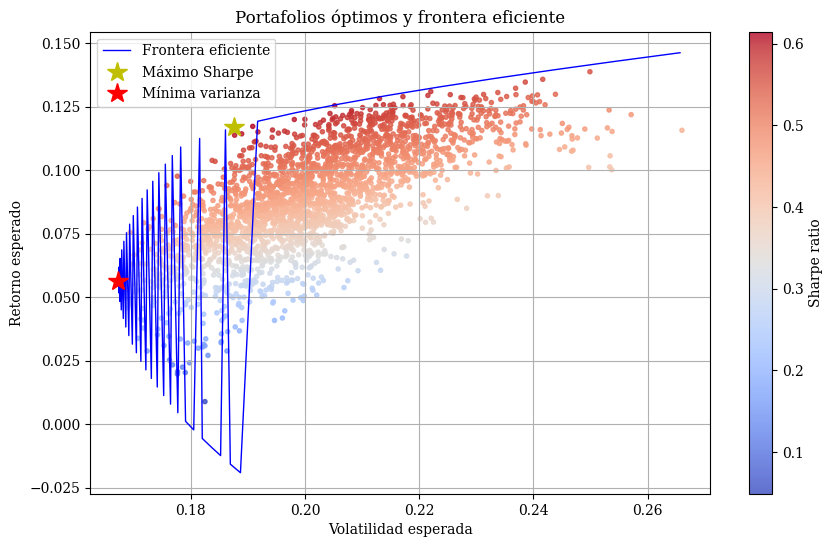

In [156]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=1.0, label='Frontera eficiente')
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=15, label='Máximo Sharpe')
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'r*', markersize=15, label='Mínima varianza')
plt.xlabel('Volatilidad esperada')
plt.ylabel('Retorno esperado')
plt.title('Portafolios óptimos y frontera eficiente')
plt.colorbar(label='Sharpe ratio')
plt.grid(True)
plt.legend()
plt.show()


># Nota técnica sobre la frontera eficiente (línea azul)
La línea azul que representa la frontera eficiente presenta algunas anomalias visuales (picos o saltos bruscos).

Esto se debe a problemas de convergencia numérica en la optimización con scipy.optimize.minimize, especialmente al resolver múltiples veces bajo diferentes retornos objetivo (target return) en la construcción paso a paso de la frontera.


## Alternativa más robusta

Para evitar los problemas de convergencia en la optimización numérica y obtener una **frontera eficiente suave y convexa**, se puede emplear una aproximación **analítica cerrada** basada en el modelo clásico de **Markowitz**.

Este enfoque permite construir la frontera eficiente sin depender de múltiples llamadas a un optimizador numérico. En su lugar, se utilizan fórmulas derivadas directamente de la teoría de portafolios.

El rendimiento esperado y la varianza de un portafolio se definen como:
$$
\
\mu_p = \mathbf{w}^\top \boldsymbol{\mu}
\
$$
$$
\
\sigma_p^2 = \mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w}
\
$$
Donde:

- $ \mu_p $ es el rendimiento esperado del portafolio
- $ \sigma_p^2 $ es la varianza del portafolio
- $ \mathbf{w} $ es el vector de pesos de los activos
- $ \boldsymbol{\mu} $ es el vector de rendimientos esperados de los activos
- $ \boldsymbol{\Sigma} $ es la matriz de covarianza de los activos

Con este enfoque se puede trazar toda la frontera eficiente como una parábola en el espacio riesgo-retorno, calculando combinaciones convexas entre el portafolio de mínima varianza y otros portafolios eficientes, garantizando estabilidad y consistencia.



In [157]:
import numpy as np
import matplotlib.pyplot as plt

def analitical_efficient_frontier(log_returns, n_puntos=200):
    """
    Calcula la frontera eficiente usando el enfoque analítico (modelo cerrado de Markowitz).

    Parámetros:
    - log_returns: DataFrame o array con rendimientos logarítmicos
    - n_puntos: Número de puntos en la curva

    Retorna:
    - sigmas: array de volatilidades
    - mus: array de rendimientos esperados
    """
    # Estadísticas
    mu = log_returns.mean().values * 252          # vector de medias anuales
    Sigma = log_returns.cov().values * 252        # matriz de covarianzas anualizada
    ones = np.ones(len(mu))

    # Constantes de la fórmula cerrada
    A = mu @ np.linalg.inv(Sigma) @ mu
    B = mu @ np.linalg.inv(Sigma) @ ones
    C = ones @ np.linalg.inv(Sigma) @ ones
    D = A * C - B**2

    # Rango de retornos deseados (entre mínimo y máximo de los activos)
    mu_p = np.linspace(mu.min(), mu.max(), n_puntos)

    # Fórmula de varianza para cada retorno objetivo
    sigma2_p = (C * mu_p**2 - 2 * B * mu_p + A) / D
    sigma_p = np.sqrt(sigma2_p)

    return sigma_p, mu_p


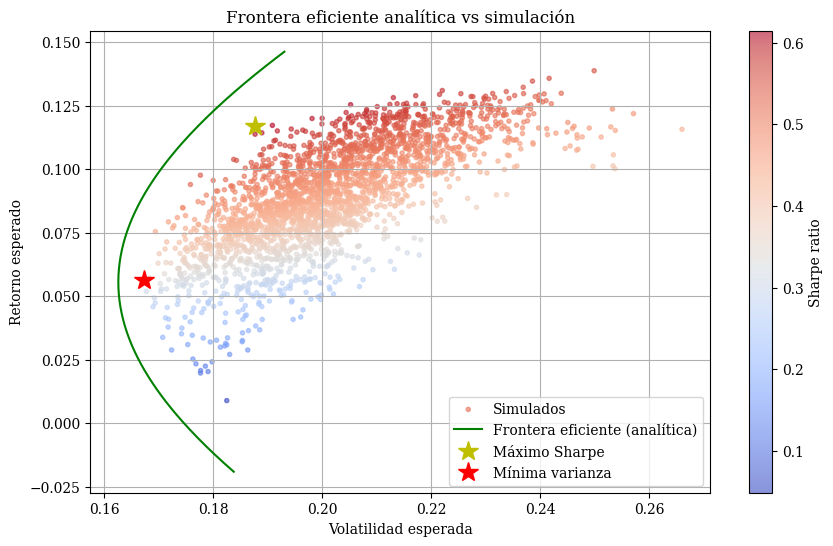

In [158]:
# Calcular frontera eficiente analítica
sigma_p, mu_p = analitical_efficient_frontier(log_returns)

# Graficar junto con portafolios simulados si los tienes
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='.', alpha=0.6, cmap='coolwarm', label='Simulados')
plt.plot(sigma_p, mu_p, 'g-', lw=1.5, label='Frontera eficiente (analítica)')

# Opcional: puntos óptimos
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=15, label='Máximo Sharpe')
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'r*', markersize=15, label='Mínima varianza')

plt.xlabel('Volatilidad esperada')
plt.ylabel('Retorno esperado')
plt.title('Frontera eficiente analítica vs simulación')
plt.colorbar(label='Sharpe ratio')
plt.legend()
plt.grid(True)
plt.show()


La frontera eficiente está compuesta por todos los portafolios óptimos que ofrecen un retorno mayor que el del portafolio de varianza mínima absoluta.

Estos portafolios dominan a todos los demás en términos de retorno esperado, dado un cierto nivel de riesgo.

# Línea del Mercado de Capitales (Capital Market Line)

Además de los instrumentos financieros riesgosos como acciones o materias primas (por ejemplo, el oro), en general existe una **oportunidad de inversión universal libre de riesgo**: el efectivo o las cuentas de efectivo.

En un mundo idealizado, el dinero depositado en una cuenta bancaria puede considerarse libre de riesgo (por ejemplo, por medio de esquemas públicos de seguro de depósitos).

>  *La desventaja es que este tipo de inversión sin riesgo generalmente ofrece un rendimiento muy bajo, a veces cercano a cero.*

---

## Combinando activos riesgosos y libres de riesgo

Incluir un activo libre de riesgo **amplía el conjunto eficiente de inversiones**. El inversionista:

1. Selecciona un **portafolio eficiente de activos riesgosos**.
2. Luego **mezcla** dicho portafolio con el activo sin riesgo.

Esto permite alcanzar **cualquier perfil riesgo-retorno** que esté sobre la **línea recta** entre:
- El activo libre de riesgo
- El portafolio eficiente elegido

---

## ¿Qué portafolio eficiente es el óptimo?

El portafolio óptimo es aquel cuya **tangente** a la frontera eficiente **pasa por el punto**:
$$
\
(\sigma_f, r_f) = (0, 0.01)
\
$$
Donde $ r_f $ es el rendimiento del activo libre de riesgo (ej. 1%).

---

## Interpolación y derivadas

Para realizar este análisis de forma precisa, se usa una aproximación funcional continua de la frontera eficiente:

- $ f(x) $: función suavizada de la frontera eficiente
- $ f'(x) $: su derivada

> Esto se logra usando interpolación con **splines cúbicos**, permitiendo encontrar de forma numérica el punto tangente óptimo que maximiza el ratio de Sharpe.


In [159]:
import scipy.interpolate as sci

In [160]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [161]:
tck = sci.splrep(evols, erets)

In [164]:
def f(x):
    ''' Función frontera eficiente (Aproximación con Spline). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' Primer Derivada de la funcion frontera eficiente. '''
    return sci.splev(x, tck, der=1)

# Derivación de la Línea del Mercado de Capitales (Capital Market Line)

El objetivo ahora es derivar una **función lineal** que represente la línea que conecta el activo libre de riesgo con el portafolio eficiente tangente:
$$
\
t(x) = a + b \cdot x
\
$$
Esta línea:
- **Pasa por el activo libre de riesgo** en el espacio riesgo-retorno.
- Es **tangente** a la **frontera eficiente** de portafolios riesgosos.

---

#Desafío técnico

Dado que **no existe una fórmula cerrada** para la frontera eficiente ni para su derivada primera, es necesario resolver un **sistema de ecuaciones no lineales**.

Para ello, utilizamos:

```python
#from scipy.optimize import fsolve


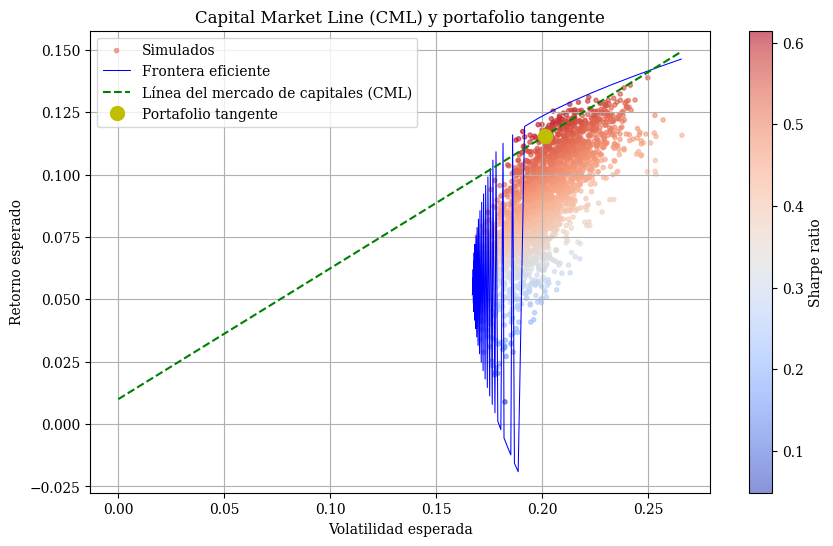

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.optimize import fsolve

# Parámetro: tasa libre de riesgo
rf = 0.01  # 1%

# Paso 1: Interpolación spline de la frontera eficiente analítica
sigma_p, mu_p = efficient_frontier(log_returns)
spline = CubicSpline(sigma_p, mu_p)

# Derivada del spline
spline_deriv = spline.derivative()

# Paso 2: Sistema de ecuaciones a resolver para encontrar la tangente
def equations(p):
    x, b = p  # x = sigma de tangencia, b = pendiente (Sharpe)
    eq1 = spline(x) - (rf + b * x)         # condición de tangencia (altura)
    eq2 = spline_deriv(x) - b              # condición de tangencia (pendiente)
    return [eq1, eq2]

# Paso 3: Aproximación inicial (educada) para fsolve
x0_guess = [0.2, 0.5]  # [volatilidad estimada, pendiente inicial]
x_tang, b_tang = fsolve(equations, x0_guess)

# Paso 4: Parámetros de la recta tangente
def capital_market_line(x):
    return rf + b_tang * x

# Paso 5: Gráfica final
x_vals = np.linspace(0, max(sigma_p), 100)

plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='.', cmap='coolwarm', alpha=0.6, label='Simulados')
plt.plot(sigma_p, mu_p, 'b-', lw=0.75, label='Frontera eficiente ')
plt.plot(x_vals, capital_market_line(x_vals), 'g--', lw=1.5, label='Línea del mercado de capitales (CML)')

# Punto de tangencia
plt.plot(x_tang, spline(x_tang), 'yo', markersize=10, label='Portafolio tangente')

plt.xlabel('Volatilidad esperada')
plt.ylabel('Retorno esperado')
plt.title('Capital Market Line (CML) y portafolio tangente')
plt.colorbar(label='Sharpe ratio')
plt.grid(True)
plt.legend()
plt.show()


### Pesos del Portafolio Tangente

Los **pesos del portafolio óptimo (tangente)** son los siguientes:

> Solo **tres de los cuatro activos** forman parte de la combinación óptima:


In [178]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(port_vol, eweights, method='SLSQP',
        bounds=bnds, constraints=cons)

In [179]:
res['x'].round(3)

array([0.612, 0.388, 0.   , 0.   ])

In [180]:
port_ret(res['x'])

np.float64(0.0591846912356146)

In [182]:
port_vol(res['x'])

np.float64(0.16735411080524326)

In [183]:
port_ret(res['x']) / port_vol(res['x'])

np.float64(0.3536494619154603)

# Composición del Portafolio Tangente

| Activo | Peso (%) |
|--------|----------|
| SPY    | 61.2%    |
| EEM    | 38.8%    |
| AAPL   | 0.0%     |
| MSFT   | 0.0%     |


##Esto refleja que el portafolio tangente óptimo, para la línea de mercado de ##capitales (CML), está compuesto solo por SPY y EEM.